In [1]:
#1.b
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:05, 21.94it/s]                                                        


Epoch 1 of 100
Generator loss: -0.25393392, Discriminator loss: 0.45955261


118it [00:05, 22.06it/s]                                                        


Epoch 2 of 100
Generator loss: -0.00002544, Discriminator loss: 0.00004213


118it [00:05, 21.88it/s]                                                        


Epoch 3 of 100
Generator loss: -0.00002267, Discriminator loss: 0.00003562


118it [00:05, 21.00it/s]                                                        


Epoch 4 of 100
Generator loss: -0.00002127, Discriminator loss: 0.00003182


118it [00:05, 22.79it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 5 of 100
Generator loss: -0.00001983, Discriminator loss: 0.00002765


118it [00:05, 22.51it/s]                                                        


Epoch 6 of 100
Generator loss: -0.00001702, Discriminator loss: 0.00002487


118it [00:05, 21.65it/s]                                                        


Epoch 7 of 100
Generator loss: -0.00001533, Discriminator loss: 0.00002280


118it [00:05, 21.78it/s]                                                        


Epoch 8 of 100
Generator loss: -0.00001485, Discriminator loss: 0.00002023


118it [00:05, 22.07it/s]                                                        


Epoch 9 of 100
Generator loss: -0.00001301, Discriminator loss: 0.00001972


118it [00:05, 21.27it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 10 of 100
Generator loss: -0.00001286, Discriminator loss: 0.00001714


118it [00:05, 22.07it/s]                                                        


Epoch 11 of 100
Generator loss: -0.00001275, Discriminator loss: 0.00001605


118it [00:05, 21.74it/s]                                                        


Epoch 12 of 100
Generator loss: -0.00001223, Discriminator loss: 0.00001732


118it [00:05, 22.90it/s]                                                        


Epoch 13 of 100
Generator loss: -0.00001248, Discriminator loss: 0.00001747


118it [00:05, 21.76it/s]                                                        


Epoch 14 of 100
Generator loss: -0.00001648, Discriminator loss: 0.00002126


118it [00:05, 22.99it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 15 of 100
Generator loss: -0.00036947, Discriminator loss: 0.01976665


118it [00:05, 21.76it/s]                                                        


Epoch 16 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000451


118it [00:05, 21.08it/s]                                                        


Epoch 17 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000149


118it [00:05, 21.78it/s]                                                        


Epoch 18 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000085


118it [00:05, 20.23it/s]                                                        


Epoch 19 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000244


118it [00:05, 20.96it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 20 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000031


118it [00:05, 21.47it/s]                                                        


Epoch 21 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000039


118it [00:05, 22.73it/s]                                                        


Epoch 22 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000040


118it [00:05, 20.98it/s]                                                        


Epoch 23 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000025


118it [00:05, 21.46it/s]                                                        


Epoch 24 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000021


118it [00:05, 20.55it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 25 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000018


118it [00:06, 18.45it/s]                                                        


Epoch 26 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000015


118it [00:06, 19.36it/s]                                                        


Epoch 27 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000022


118it [00:05, 20.34it/s]                                                        


Epoch 28 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000011


118it [00:06, 19.64it/s]                                                        


Epoch 29 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000015


118it [00:05, 20.38it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 30 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000010


118it [00:05, 20.67it/s]                                                        


Epoch 31 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000010


118it [00:05, 20.11it/s]                                                        


Epoch 32 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000010


118it [00:05, 20.04it/s]                                                        


Epoch 33 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000010


118it [00:05, 20.70it/s]                                                        


Epoch 34 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000014


118it [00:05, 20.36it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 35 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000007


118it [00:06, 19.30it/s]                                                        


Epoch 36 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000007


118it [00:05, 20.78it/s]                                                        


Epoch 37 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000006


118it [00:06, 19.51it/s]                                                        


Epoch 38 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000007


118it [00:05, 20.10it/s]                                                        


Epoch 39 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000005


118it [00:06, 19.17it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 40 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000005


118it [00:05, 20.97it/s]                                                        


Epoch 41 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000006


118it [00:05, 20.15it/s]                                                        


Epoch 42 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000007


118it [00:05, 20.35it/s]                                                        


Epoch 43 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000006


118it [00:05, 20.81it/s]                                                        


Epoch 44 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000004


118it [00:06, 19.60it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 45 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000004


118it [00:06, 19.67it/s]                                                        


Epoch 46 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000004


118it [00:05, 20.97it/s]                                                        


Epoch 47 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000006


118it [00:05, 20.66it/s]                                                        


Epoch 48 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:06, 18.84it/s]                                                        


Epoch 49 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000008


118it [00:06, 19.07it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 50 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000003


118it [00:06, 17.53it/s]                                                        


Epoch 51 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:06, 17.31it/s]                                                        


Epoch 52 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:06, 17.72it/s]                                                        


Epoch 53 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:06, 17.10it/s]                                                        


Epoch 54 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:06, 17.51it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 55 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000003


118it [00:06, 17.63it/s]                                                        


Epoch 56 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:06, 17.78it/s]                                                        


Epoch 57 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:06, 17.89it/s]                                                        


Epoch 58 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:06, 17.28it/s]                                                        


Epoch 59 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:06, 17.51it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 60 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:06, 17.44it/s]                                                        


Epoch 61 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:06, 16.94it/s]                                                        


Epoch 62 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:06, 17.75it/s]                                                        


Epoch 63 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:07, 16.52it/s]                                                        


Epoch 64 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:06, 17.84it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 65 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:07, 16.21it/s]                                                        


Epoch 66 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:06, 18.10it/s]                                                        


Epoch 67 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:06, 17.99it/s]                                                        


Epoch 68 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:06, 17.81it/s]                                                        


Epoch 69 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:07, 16.46it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 70 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:07, 16.55it/s]                                                        


Epoch 71 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:07, 16.75it/s]                                                        


Epoch 72 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:07, 16.59it/s]                                                        


Epoch 73 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:07, 16.71it/s]                                                        


Epoch 74 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:07, 16.49it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 75 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.54it/s]                                                        


Epoch 76 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:07, 16.49it/s]                                                        


Epoch 77 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:07, 16.19it/s]                                                        


Epoch 78 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:07, 16.62it/s]                                                        


Epoch 79 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:07, 16.67it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 80 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.52it/s]                                                        


Epoch 81 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.44it/s]                                                        


Epoch 82 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:07, 16.49it/s]                                                        


Epoch 83 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.45it/s]                                                        


Epoch 84 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.28it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 85 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.31it/s]                                                        


Epoch 86 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.84it/s]                                                        


Epoch 87 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:07, 16.75it/s]                                                        


Epoch 88 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.10it/s]                                                        


Epoch 89 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.83it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 90 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.52it/s]                                                        


Epoch 91 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.89it/s]                                                        


Epoch 92 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.52it/s]                                                        


Epoch 93 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.91it/s]                                                        


Epoch 94 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.46it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 95 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.68it/s]                                                        


Epoch 96 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.18it/s]                                                        


Epoch 97 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.54it/s]                                                        


Epoch 98 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 17.24it/s]                                                        


Epoch 99 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:06, 18.19it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 100 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


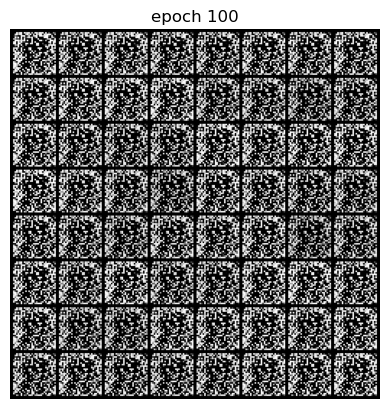

In [16]:
torch.manual_seed(7)
def generator_loss(output, true_label):
    return torch.sum(torch.log(true_label - output)) / torch.sum(true_label) 
    
def discriminator_loss(output, true_label):
    return criterion(output, true_label)

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):

        x = data[0]

        ### UPDATE DISCRIMINATOR ###
        optim_d.zero_grad() # initialize gradient

        # real pass
        real_output = discriminator.forward(x)
        d_loss_real = discriminator_loss(real_output, label_real(real_output.size()[0]))

        # fake pass
        fake_data = generator.forward(create_noise(sample_size, nz))
        fake_output = discriminator.forward(fake_data)
        d_loss_fake = discriminator_loss(fake_output, label_fake(sample_size))

        loss_D = d_loss_real + d_loss_fake
        loss_D.backward()
        optim_d.step()

        loss_d += loss_D.detach().numpy()

        ### UPDATE GENERATOR ###
        optim_g.zero_grad()

        generated_data = generator.forward(create_noise(sample_size, nz))
        generated_output = discriminator.forward(generated_data)
        loss_G = generator_loss(generated_output, label_real(sample_size)) 
        loss_G.backward()
        optim_g.step()

        loss_g += loss_G.detach().numpy()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        # plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"output/new_loss_gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [17]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [19]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('output/generator_images.gif', imgs)

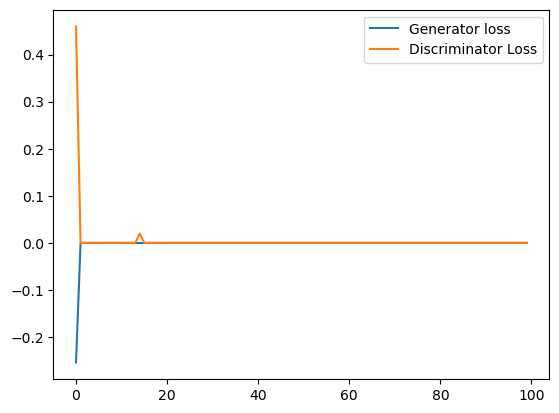

In [20]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('output/loss.png')